In [1]:
PERFORMANCE = { "CIFAR10":{"SUPERVISED":{"SEED":[1,2,3,4,5,6,7,8,9,10],"ACCURACY":[75.28,77.30,77.43,75.23,78.22,76.58,76.62,77.43,76.87,75.43],"NLL": [3.928, 2.429, 3.448, 3.568, 3.420, 3.521, 4.065, 2.602, 2.658, 3.640],"ECE": [0.224,0.194, 0.204, 0.222, 0.195, 0.210, 0.215,0.197,0.201,0.221]},
                           "MTC":{"SEED":[2,6,7,8,9],"ACCURACY":{"alpha=0.3":[82.7,83.5,82.3,80.9,81.7],"alpha=0.6":[80,79.48,79.40,80.48,79.34]},"NLL": {"alpha=0.3":[],"alpha=0.6":[]},"ECE": {"alpha=0.3":[],"alpha=0.6":[]}},
                           "FIXMATCH":{"SEED":[2,6,7,8,9],"ACCURACY":{"alpha=0.3":[88.47,87.98,87.42,88.37,88.38], "alpha=0.6":[85.98,84.52,85.52,85.98,85.60]},"NLL":{"alpha=0.3":[0.863,0.954,1.048,0.887,0.970],"alpha=0.6":[1.203,1.318,1.107,1.032,1.104]},"ECE":{"alpha=0.3":[0.092,0.099,0.104,0.096,0.095],"alpha=0.6":[0.114,0.130,0.115,0.110,0.113]}},
                           "OPENMATCH":{"SEED":[2,6,7,8,9], "ACCURACY":{"alpha=0.3":[88.35,88.25,88.07,87.72,87.80],"alpha=0.6":[86.25,86.82,84.77,86.67,86.45]},"NLL":{"alpha=0.3":[1.048,0.948,1.119,0.784,0.898],"alpha=0.6":[1.264,1.071,1.355,1.264,1.362]},"ECE":{"alpha=0.3":[0.096,0.098,0.099,0.091,0.095],"alpha=0.6":[0.113,0.107,0.127,0.112,0.114]}},
                           "CALIMATCH":{"SEED": [2,6,7,8,9],"ACCURACY": {"alpha=0.3":[90.10,89.55,89.07,89.87,89.88], "alpha=0.6":[87.90,87.18,86.98,86.95,87.40]},"NLL": {"alpha=0.3":[0.335,0.346,0.378,0.344,0.332], "alpha=0.6":[0.404,0.437,0.439,0.423,0.439]},"ECE": {"alpha=0.3":[0.028,0.024,0.038,0.037,0.028], "alpha=0.6":[0.040,0.048,0.034,0.037,0.049]}},
                           "IOMATCH":{"SEED":[2,6,7,8,9],"ACCURACY":{"alpha=0.3":[89.69,89.19,88.79,88.99,89.39],"alpha=0.6":[85.89,85.09,85.89,87.89,86.39]},
                                      "NLL":{"alpha=0.3":[0.779,0.694,0.879,0.627,0.677],"alpha=0.6":[0.931,1.166,1.038,0.917,0.837]},
                                      "ECE":{"alpha=0.3":[0.083,0.082,0.090,0.082,0.079],"alpha=0.6":[0.108,0.121,0.112,0.095,0.101]}},
                           "ABLATION1":{"SEED":[2,6,7,8,9], "ACCURACY":{"alpha=0.3":[90.27,90.28,90.62,90.82,90.53],"alpha=0.6":[87.13,85.85,85.55,88.15,87.30]},"NLL":{"alpha=0.3":[0.337,0.332,0.341,0.314,0.329],"alpha=0.6":[0.439,0.474,0.481,0.408,0.454]}, "ECE":{"alpha=0.3":[0.029,0.035,0.038,0.026,0.041],"alpha=0.6":[0.039,0.054,0.052,0.036,0.057]}},
                           "OPENMATCH-w/o-ood":{"SEED":[2,6,7], "ACCURACY":{"alpha=0.3":[89.13,87.1,86.6],"alpha=0.6":[85.7,84.67,84.57]},"NLL":{"alpha=0.3":[0.938,0.740,0.980],"alpha=0.6":[1.084,1.117,1.198]},"ECE":{"alpha=0.3":[0.087,0.093,0.106],"alpha=0.6":[0.111,0.119,0.125]}},
                           "OPENMATCH-w/o-wrong.id":{"SEED":[2,6,7], "ACCURACY":{"alpha=0.3":[],"alpha=0.6":[]},"NLL":{"alpha=0.3":[],"alpha=0.6":[]},"ECE":{"alpha=0.3":[],"alpha=0.6":[]}},

                           "CALI+COSINE":{"SEED":[2,6,7,8,9], "ACCURACY":{"alpha=0.3":[89.18,90.27,90.38,88.65,89.62],"alpha=0.6":[87.92,86.27,86.30,88.30,88.35]},"NLL":{"alpha=0.3":[0.370,0.331,0.336,0.409,0.362],"alpha=0.6":[0.419,0.456,0.483,0.410,0.402]},"ECE":{"alpha=0.3":[0.042,0.030,0.034,0.059,0.034],"alpha=0.6":[0.035,0.043,0.061,0.038,0.034]}},
                           },
               
                "CIFAR100":{"SUPERVISED":{"SEED":[1,2,3,4,5,6,7,8,9,10],"ACCURACY":[60.08,60.18,60.70,60.72,59.58,60.30,60.40,59.96,61.70,61.06],"NLL": [6.012,5.546,6.240,5.669,5.725,6.101,6.053,5.914,5.809,5.724],"ECE": [0.345,0.338,0.345,0.341,0.345,0.342,0.343,0.343,0.332,0.333]},
                            "FIXMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[69.24,69.38,68.56,68.26,68.28], "alpha=0.6":[65.02, 64.92, 65.26, 63.84, 64.26]},"NLL":{"alpha=0.3":[2.579,2.459,2.482,2.468,2.514], "alpha=0.6":[2.300,2.549,2.409,3.020,2.883]},"ECE":{"alpha=0.3":[0.234,0.227,0.236,0.233,0.238], "alpha=0.6":[0.243,0.251,0.249,0.276,0.266]}},
                            "CALIMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[71.46,70.50,70.82,70.10,70.62], "alpha=0.6":[68.48,68.50,68.00,66.36,67.02]},"NLL":{"alpha=0.3":[1.130,1.164,1.163,1.202,1.144], "alpha=0.6":[1.248,1.261,1.264,1.303,1.318]},"ECE":{"alpha=0.3":[0.047,0.021,0.016,0.073,0.017], "alpha=0.6":[0.028,0.031,0.030,0.041,0.025]}},
                            "IOMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[69.79,70.29,68.69,69.79,68.19], "alpha=0.6":[65.89,65.70,65.49,66.69,64.19]},"NLL":{"alpha=0.3":[2.123,2.082,1.955,1.872,2.370], "alpha=0.6":[2.249,2.361,2.213,2.050,2.222]},"ECE":{"alpha=0.3":[0.215,0.215,0.211,0.206,0.232], "alpha=0.6":[0.229,0.242,0.237,0.221,0.238]}},
                            "ABLATION1":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[72.58,72.16,71.44,69.10,71.24],"alpha=0.6":[68.58,68.92,68.20,67.72,69.24]},"NLL":{"alpha=0.3":[1.097,1.106,1.115,1.183,1.153],"alpha=0.6":[1.238,1.233,1.258,1.342,1.248]},"ECE":{"alpha=0.3":[0.019,0.017,0.032,0.034,0.010],"alpha=0.6":[0.037,0.021,0.040,0.098,0.036]}},
                            "OPENMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[69.94,70.88,69.50,69.90,68.02],"alpha=0.6":[64.84,67.66,65.34,65.20,65.20]},"NLL":{"alpha=0.3":[2.396,2.481,2.359,2.393,2.646],"alpha=0.6":[2.798,2.768,2.768,2.758,2.738]},"ECE":{"alpha=0.3":[0.225,0.218,0.224,0.224,0.239],"alpha=0.6":[0.259,0.245,0.259,0.261,0.256]}},
                            "CALI+COSINE":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[69.88,72.46,72.20,71.84,69.88],"alpha=0.6":[67.60,69.14,68.46,69.28,68.36]},"NLL":{"alpha=0.3":[1.170,1.086,1.097,1.096,1.196],"alpha=0.6":[1.331,1.235,1.294,1.222,1.294]},"ECE":{"alpha=0.3":[0.014,0.042,0.039,0.014,0.053],"alpha=0.6":[0.079,0.019,0.035,0.048,0.084]}},
                },
                
                "TINY":{"SUPERVISED":{"SEED":[1,2,5,6,10],"ACCURACY":[39.06,39.32,40.54,39.20,40.30],"NLL":[10.807,10.580,10.142,10.479,10.475],"ECE":[0.523,0.516,0.501,0.519,0.506]},
                        "FIXMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[45.90,45.22,47.28,46.06,45.84],"alpha=0.6":[43.30,43.28,42.80,43.24,41.90]},"NLL":{"alpha=0.3":[4.808,4.920,4.675,4.730,4.930],"alpha=0.6":[5.296,5.029,5.053,5.196,5.227]},"ECE":{"alpha=0.3":[0.385,0.392,0.372,0.386,0.388],"alpha=0.6":[0.405,0.402,0.402,0.410,0.419]}},
                        "IOMATCH":{"SEED":[1,2,5,6,10], "ACCURACY":{"alpha=0.3":[45.89,45.09,47.49,45.99,47.20],"alpha=0.6":[42.49,42.99,42.89,42.39,44.99]},"NLL":{"alpha=0.3":[4.243,4.399,4.141,4.381,4.281],"alpha=0.6":[4.726,4.823,4.748,4.942,4.521]},"ECE":{"alpha=0.3":[0.369,0.373,0.354,0.365,0.355],"alpha=0.6":[0.397,0.394,0.397,0.398,0.379]}},
                        "ABLATION1":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[46.60,47.90,47.54,46.86,47.76],"alpha=0.6":[43.78,43.48,45.74,44.76,44.78]},"NLL":{"alpha=0.3":[2.709,2.650,2.658,2.638,2.631],"alpha=0.6":[3.137,2.943,2.739,2.895,2.798]},"ECE":{"alpha=0.3":[0.211,0.205,0.206,0.204,0.196],"alpha=0.6":[0.263,0.261,0.226,0.246,0.224]}},
                        "OPENMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[47.52,47.10,47.20,45.70,46.98],"alpha=0.6":[42.98,43.80,44.20,44.92,44.20]},"NLL":{"alpha=0.3":[4.970,5.199,4.998,5.397,5.254],"alpha=0.6":[5.655,5.578,5.782,5.203,5.476]},"ECE":{"alpha=0.3":[0.384,0.391,0.382,0.398,0.385],"alpha=0.6":[0.423,0.413,0.418,0.398,0.411]}},
                        "CALI+COSINE":{"SEED":[1,2,5,6,10], "ACCURACY":{"alpha=0.3":[47.92,48.42,48.34,47.14,47.42],"alpha=0.6":[45.22,45.36,45.72,44.88,45.06]},"NLL":{"alpha=0.3":[2.434,2.405,2.463,2.459,2.471],"alpha=0.6":[2.626,2.658,2.606,2.669,2.670]}, "ECE":{"alpha=0.3":[0.149,0.146,0.149,0.155,0.154],"alpha=0.6":[0.174,0.186,0.177,0.181,0.187]}},
                        },

                "SVHN":{"SUPERVISED":{"SEED":[1,2,5,6,10],"ACCURACY":[86.25,86.05,87.57,84.61,84.64],"NLL":[1.445,1.474,1.333,1.775,1.804],"ECE":[0.117,0.118,0.106,0.130,0.135]},
                        "FIXMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[95.16,94.68,95.51,95.75,95.54],"alpha=0.6":[94.70,93.92,94.16,93.81,94.41]},"NLL":{"alpha=0.3":[0.242,0.307,0.240,0.243,0.245],"alpha=0.6":[0.284,0.304,0.280,0.289,0.292]},"ECE":{"alpha=0.3":[0.029,0.034,0.028,0.028,0.028],"alpha=0.6":[0.032,0.039,0.036,0.038,0.036]}},
                        "IOMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[96.20,96.00,95.30,96.00,95.10],"alpha=0.6":[94.40,94.20,94.80,95.00,94.20]}, "NLL":{'alpha=0.3':[0.183,0.188,0.250,0.198,0.258],'alpha=0.6':[0.245,0.266,0.277,0.248,0.257]},"ECE":{"alpha=0.3":[0.021,0.022,0.029,0.021,0.033],"alpha=0.6":[0.031,0.034,0.033,0.029,0.033]}},
                        "ABLATION1":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[96.03,96.18,96.33,95.61,96.43],"alpha=0.6":[95.63,95.63,95.92,94.96,95.56]}, "NLL":{'alpha=0.3':[0.146,0.142,0.145,0.164,0.135],'alpha=0.6':[0.159,0.152,0.152,0.176,0.165]},"ECE":{"alpha=0.3":[0.021,0.014,0.014,0.019,0.016],"alpha=0.6":[0.013,0.009,0.012,0.004,0.019]}},
                        "OPENMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[96.89,96.58,96.87,96.32,96.44],"alpha=0.6":[95.79,95.45,95.64,95.61,95.86]},"NLL":{"alpha=0.3":[0.200,0.159,0.173,0.179,0.209],"alpha=0.6":[0.256,0.239,0.200,0.212,0.208]},"ECE":{"alpha=0.3":[0.022,0.018,0.020,0.022,0.023],"alpha=0.6":[0.029,0.029,0.023,0.026,0.024]}},

                        "OPENMATCH-w/o-ood":{"SEED":[2,6,7], "ACCURACY":{"alpha=0.3":[],"alpha=0.6":[]},"NLL":{"alpha=0.3":[],"alpha=0.6":[]},"ECE":{"alpha=0.3":[],"alpha=0.6":[]}},
                        "OPENMATCH-w/o-wrong.id":{"SEED":[2,6,7], "ACCURACY":{"alpha=0.3":[],"alpha=0.6":[]},"NLL":{"alpha=0.3":[],"alpha=0.6":[]},"ECE":{"alpha=0.3":[],"alpha=0.6":[]}},

                        "CALI+COSINE":{"SEED":[1,2,5,6,10], "ACCURACY":{"alpha=0.3":[96.00,95.88,96.01,96.18,96.55],"alpha=0.6":[95.73,95.65,95.52,95.17,95.51]},"NLL":{"alpha=0.3":[0.145,0.151,0.152,0.144,0.130],"alpha=0.6":[0.151,0.161,0.159,0.168,0.162]}, "ECE":{"alpha=0.3":[0.008,0.013,0.011,0.013,0.013],"alpha=0.6":[0.009,0.014,0.005,0.010,0.013]}},
                        }
                        }

# 지도학습 

In [2]:
import pandas
CIFAR10_SUPERVISED=pandas.DataFrame(PERFORMANCE['CIFAR10']['SUPERVISED'])
print(CIFAR10_SUPERVISED.loc[CIFAR10_SUPERVISED['SEED'].isin([2,6,7,8,9])].agg(['mean','std']))

CIFAR100_SUPERVISED=pandas.DataFrame(PERFORMANCE['CIFAR100']['SUPERVISED'])
print(CIFAR100_SUPERVISED.loc[CIFAR100_SUPERVISED['SEED'].isin([1,2,5,6,10])].agg(['mean','std']))

TINY_SUPERVISED=pandas.DataFrame(PERFORMANCE['TINY']['SUPERVISED'])
print(TINY_SUPERVISED.loc[TINY_SUPERVISED['SEED'].isin([1,2,5,6,10])].agg(['mean','std']))

SVHN_SUPERVISED=pandas.DataFrame(PERFORMANCE['SVHN']['SUPERVISED'])
print(SVHN_SUPERVISED.loc[SVHN_SUPERVISED['SEED'].isin([1,2,5,6,10])].agg(['mean','std']))

          SEED  ACCURACY       NLL       ECE
mean  6.400000  76.96000  3.055000  0.203400
std   2.701851   0.38878  0.705682  0.008849
          SEED   ACCURACY       NLL       ECE
mean  4.800000  60.240000  5.821600  0.340600
std   3.563706   0.534041  0.228653  0.005128
          SEED   ACCURACY        NLL       ECE
mean  4.800000  39.684000  10.496600  0.513000
std   3.563706   0.683433   0.239698  0.009192
          SEED   ACCURACY       NLL       ECE
mean  4.800000  85.824000  1.566200  0.121200
std   3.563706   1.240637  0.210784  0.011476


# FIXMATCH

In [3]:
import numpy, pandas
pandas.DataFrame()
results = {"data":[],"metric":[],"alpha":[],"algs":[],"value":[]}
for data in ["CIFAR10",'CIFAR100']:
    for metric in ['ACCURACY','ECE']:
        for alpha in [0.3, 0.6]:
            value = str(numpy.mean(PERFORMANCE[data]['FIXMATCH'][metric][f"alpha={alpha}"]).round(3)) + "(" + str(numpy.std(PERFORMANCE[data]['FIXMATCH'][metric][f"alpha={alpha}"]).round(3)) + ")"

            results["data"].append(data)
            results["metric"].append(metric)
            results["alpha"].append(alpha)
            results["value"].append(value)
            results["algs"].append("FIXMATCH")
            
results = pandas.DataFrame(results)
pandas.pivot(results, columns=['data','alpha','metric'], values='value', index='algs')

data           CIFAR10                                            \
alpha              0.3           0.6           0.3           0.6   
metric        ACCURACY      ACCURACY           ECE           ECE   
algs                                                               
FIXMATCH  88.124(0.39)  85.52(0.535)  0.097(0.004)  0.116(0.007)   

data           CIFAR100                                            
alpha               0.3           0.6           0.3           0.6  
metric         ACCURACY      ACCURACY           ECE           ECE  
algs                                                               
FIXMATCH  68.744(0.476)  64.66(0.527)  0.234(0.004)  0.257(0.012)

In [4]:
import numpy, pandas
pandas.DataFrame()
results = {"data":[],"metric":[],"alpha":[],"algs":[],"value":[]}
for data in ["CIFAR10",'CIFAR100']:
    for metric in ['ACCURACY','ECE']:
        for alpha in [0.3, 0.6]:
            for algs in ['FIXMATCH','CALIMATCH']:

                value = str(numpy.mean(PERFORMANCE[data][algs][metric][f"alpha={alpha}"]).round(3)) + "(" + str(numpy.std(PERFORMANCE[data][algs][metric][f"alpha={alpha}"]).round(3)) + ")"

                results["data"].append(data)
                results["metric"].append(metric)
                results["alpha"].append(alpha)
                results["value"].append(value)
                results["algs"].append(algs)
            
results = pandas.DataFrame(results)
pandas.pivot(results, columns=['data','alpha','metric'], values='value', index='algs')

data             CIFAR10                                             \
alpha                0.3            0.6           0.3           0.6   
metric          ACCURACY       ACCURACY           ECE           ECE   
algs                                                                  
CALIMATCH  89.694(0.358)  87.282(0.349)  0.031(0.006)  0.042(0.006)   
FIXMATCH    88.124(0.39)   85.52(0.535)  0.097(0.004)  0.116(0.007)   

data            CIFAR100                                             
alpha                0.3            0.6           0.3           0.6  
metric          ACCURACY       ACCURACY           ECE           ECE  
algs                                                                 
CALIMATCH    70.7(0.447)  67.672(0.848)  0.035(0.022)  0.031(0.005)  
FIXMATCH   68.744(0.476)   64.66(0.527)  0.234(0.004)  0.257(0.012)

In [5]:
import numpy, pandas
pandas.DataFrame()
results = {"data":[],"metric":[],"alpha":[],"algs":[],"value":[]}
for data in ["TINY","SVHN","CIFAR10",'CIFAR100']:
    for metric in ['ACCURACY','ECE']:
        for alpha in [0.3, 0.6]:
            for algs in ['FIXMATCH']:

                value = str(numpy.mean(PERFORMANCE[data][algs][metric][f"alpha={alpha}"]).round(3)) + "(" + str(numpy.std(PERFORMANCE[data][algs][metric][f"alpha={alpha}"]).round(3)) + ")"

                results["data"].append(data)
                results["metric"].append(metric)
                results["alpha"].append(alpha)
                results["value"].append(value)
                results["algs"].append(algs)
            
results = pandas.DataFrame(results)
pandas.pivot(results, columns=['data','alpha','metric'], values='value', index='algs')

data              TINY                                             \
alpha              0.3            0.6           0.3           0.6   
metric        ACCURACY       ACCURACY           ECE           ECE   
algs                                                                
FIXMATCH  46.06(0.673)  42.904(0.535)  0.385(0.007)  0.408(0.006)   

data               SVHN                                           \
alpha               0.3          0.6           0.3           0.6   
metric         ACCURACY     ACCURACY           ECE           ECE   
algs                                                               
FIXMATCH  95.328(0.375)  94.2(0.324)  0.029(0.002)  0.036(0.002)   

data           CIFAR10                                            \
alpha              0.3           0.6           0.3           0.6   
metric        ACCURACY      ACCURACY           ECE           ECE   
algs                                                               
FIXMATCH  88.124(0.39)  85.52(0.535)  0.097(0.004)  0.116(0.007)   

data           CIFAR100                                            
alpha               0.3           0.6           0.3           0.6  
metric         ACCURACY      ACCURACY           ECE           ECE  
algs                                                               
FIXMATCH  68.744(0.476)  64.66(0.527)  0.234(0.004)  0.257(0.012)

In [3]:
import numpy, pandas
pandas.DataFrame()
results = {"data":[],"metric":[],"alpha":[],"algs":[],"value":[]}
for data in ["SVHN","CIFAR10",'CIFAR100','TINY']:
    for metric in ['ACCURACY']:
        for alpha in [0.3, 0.6]:
            for algs in ["FIXMATCH",'IOMATCH','OPENMATCH','ABLATION1','CALI+COSINE']:

                value = str(numpy.mean(PERFORMANCE[data][algs][metric][f"alpha={alpha}"]).round(3)) + "(" + str(numpy.std(PERFORMANCE[data][algs][metric][f"alpha={alpha}"]).round(3)) + ")"

                results["data"].append(data)
                results["metric"].append(metric)
                results["alpha"].append(alpha)
                results["value"].append(value)
                results["algs"].append(algs)
            
results = pandas.DataFrame(results)
pandas.pivot(results, columns=['data','alpha','metric'], values='value', index='algs')

data                  SVHN                       CIFAR10                 \
alpha                  0.3            0.6            0.3            0.6   
metric            ACCURACY       ACCURACY       ACCURACY       ACCURACY   
algs                                                                      
ABLATION1    96.116(0.287)   95.54(0.315)  90.504(0.209)  86.796(0.964)   
CALI+COSINE  96.124(0.233)  95.516(0.192)   89.62(0.653)  87.428(0.945)   
FIXMATCH     95.328(0.375)    94.2(0.324)   88.124(0.39)   85.52(0.535)   
IOMATCH       95.72(0.435)   94.52(0.325)   89.21(0.312)   86.23(0.929)   
OPENMATCH     96.62(0.228)   95.67(0.144)  88.038(0.245)  86.192(0.737)   

data              CIFAR100                          TINY                 
alpha                  0.3            0.6            0.3            0.6  
metric            ACCURACY       ACCURACY       ACCURACY       ACCURACY  
algs                                                                     
ABLATION1    71.304(1.203)  68.532(0.534)  47.332(0.511)  44.508(0.805)  
CALI+COSINE  71.252(1.137)  68.568(0.604)  47.848(0.502)  45.248(0.285)  
FIXMATCH     68.744(0.476)   64.66(0.527)   46.06(0.673)  42.904(0.535)  
IOMATCH       69.35(0.781)   65.592(0.81)  46.332(0.889)   43.15(0.948)  
OPENMATCH    69.648(0.932)   65.648(1.02)    46.9(0.626)   44.02(0.633)

In [4]:
import numpy, pandas
pandas.DataFrame()
results = {"data":[],"metric":[],"alpha":[],"algs":[],"value":[]}
for data in ["SVHN","CIFAR10",'CIFAR100','TINY']:
    for metric in ['ECE']:
        for alpha in [0.3, 0.6]:
            for algs in ["FIXMATCH",'IOMATCH','OPENMATCH','ABLATION1','CALI+COSINE']:

                value = str(numpy.mean(PERFORMANCE[data][algs][metric][f"alpha={alpha}"]).round(3)) + "(" + str(numpy.std(PERFORMANCE[data][algs][metric][f"alpha={alpha}"]).round(3)) + ")"

                results["data"].append(data)
                results["metric"].append(metric)
                results["alpha"].append(alpha)
                results["value"].append(value)
                results["algs"].append(algs)
            
results = pandas.DataFrame(results)
pandas.pivot(results, columns=['data','alpha','metric'], values='value', index='algs')

data                 SVHN                     CIFAR10                \
alpha                 0.3           0.6           0.3           0.6   
metric                ECE           ECE           ECE           ECE   
algs                                                                  
ABLATION1    0.017(0.003)  0.011(0.005)  0.034(0.006)  0.048(0.008)   
CALI+COSINE  0.012(0.002)   0.01(0.003)    0.04(0.01)   0.042(0.01)   
FIXMATCH     0.029(0.002)  0.036(0.002)  0.097(0.004)  0.116(0.007)   
IOMATCH      0.025(0.005)  0.032(0.002)  0.083(0.004)  0.107(0.009)   
OPENMATCH    0.021(0.002)  0.026(0.002)  0.096(0.003)  0.115(0.007)   

data             CIFAR100                        TINY                
alpha                 0.3           0.6           0.3           0.6  
metric                ECE           ECE           ECE           ECE  
algs                                                                 
ABLATION1    0.022(0.009)  0.046(0.027)  0.204(0.005)  0.244(0.017)  
CALI+COSINE  0.032(0.016)  0.053(0.025)  0.151(0.003)  0.181(0.005)  
FIXMATCH     0.234(0.004)  0.257(0.012)  0.385(0.007)  0.408(0.006)  
IOMATCH      0.216(0.009)  0.233(0.007)  0.363(0.008)  0.393(0.007)  
OPENMATCH    0.226(0.007)  0.256(0.006)  0.388(0.006)  0.413(0.008)

# CIFAR10-openmatch

In [9]:
import numpy, pandas
pandas.DataFrame()
results = {"data":[],"metric":[],"alpha":[],"algs":[],"value":[]}
for data in ["CIFAR10"]:
    for metric in ['ACCURACY']:
        for alpha in [0.3, 0.6]:
            for algs in ['OPENMATCH',"OPENMATCH-w/o-ood"]:

                value = str(numpy.mean(PERFORMANCE[data][algs][metric][f"alpha={alpha}"]).round(3)) + "(" + str(numpy.std(PERFORMANCE[data][algs][metric][f"alpha={alpha}"]).round(3)) + ")"

                results["data"].append(data)
                results["metric"].append(metric)
                results["alpha"].append(alpha)
                results["value"].append(value)
                results["algs"].append(algs)
            
results = pandas.DataFrame(results)
pandas.pivot(results, columns=['data','alpha','metric'], values='value', index='algs')

# PERFORMANCE['CIFAR10']['OPENMATCH']
# PERFORMANCE['CIFAR10']['OPENMATCH-w/o-ood']

data                     CIFAR10               
alpha                        0.3            0.6
metric                  ACCURACY       ACCURACY
algs                                           
OPENMATCH          88.038(0.245)  86.192(0.737)
OPENMATCH-w/o-ood   87.61(1.094)   84.98(0.511)

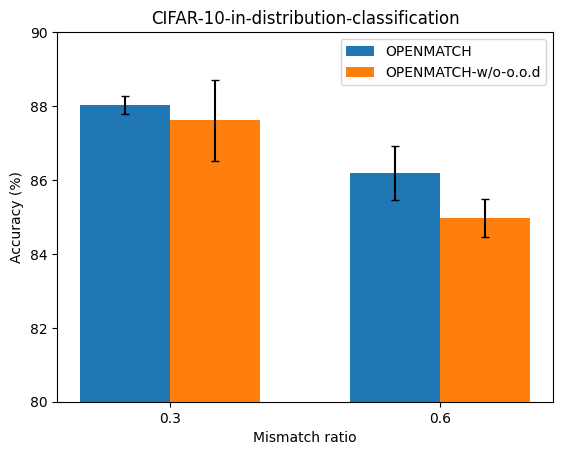

In [13]:
import matplotlib.pyplot as plt

data = {
    'CIFAR10': [0.3, 0.6],
    'alpha': ['0.3', '0.6'],
    'OPENMATCH': [88.038, 86.192],
    'OPENMATCH-w/o-ood': [87.61, 84.98],
}

error_data = {
    'OPENMATCH': [0.245, 0.737],
    'OPENMATCH-w/o-ood': [1.094, 0.511],
}

# Set the bar width
bar_width = 0.1

# Set the positions of bars on X-axis
r1 = [0,0.3]
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.bar(r1, data['OPENMATCH'], yerr=error_data['OPENMATCH'], width=bar_width, label='OPENMATCH', capsize=3)
plt.bar(r2, data['OPENMATCH-w/o-ood'], yerr=error_data['OPENMATCH-w/o-ood'], width=bar_width, label='OPENMATCH-w/o-o.o.d', capsize=3)

# Add labels to the chart
plt.xlabel('Mismatch ratio')
plt.ylabel('Accuracy (%)')
plt.xticks([(r1_+r2_)/2 for r1_,r2_ in zip(r1,r2)], data['alpha'])

# Add legend
plt.legend()
plt.ylim(80,90)
plt.title("CIFAR-10-in-distribution-classification")

# Show the plot
plt.show()

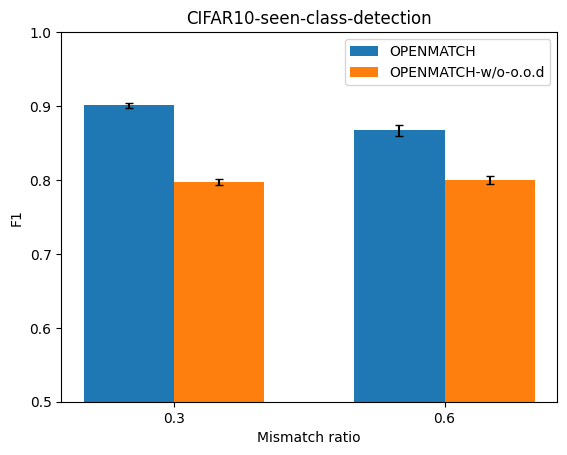

In [15]:
import matplotlib.pyplot as plt

data = {
    'CIFAR10': [0.3, 0.6],
    'alpha': ['0.3', '0.6'],
    'OPENMATCH': [0.901,0.867],
    'OPENMATCH-w/o-ood': [0.797, 0.800],
}

error_data = {
    'OPENMATCH': [0.003, 0.008],
    'OPENMATCH-w/o-ood': [0.004, 0.005],
}

# Set the bar width
bar_width = 0.1

# Set the positions of bars on X-axis
r1 = [0,0.3]
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.bar(r1, data['OPENMATCH'], yerr=error_data['OPENMATCH'], width=bar_width, label='OPENMATCH', capsize=3)
plt.bar(r2, data['OPENMATCH-w/o-ood'], yerr=error_data['OPENMATCH-w/o-ood'], width=bar_width, label='OPENMATCH-w/o-o.o.d', capsize=3)

# Add labels to the chart
plt.xlabel('Mismatch ratio')
plt.ylabel('F1')
plt.xticks([(r1_+r2_)/2 for r1_,r2_ in zip(r1,r2)], data['alpha'])

# Add legend
plt.legend()
plt.title('CIFAR10-seen-class-detection')
plt.ylim(0.5,1)

# Show the plot
plt.show()

# SVHN - Ablation1

2024-04-08 12:25:59,126 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:26:04,111 [INFO ]  top@1: 0.96191 | top@1-ova: 0.96460 | ECE: 0.02375 | ECE-ova: 0.12600 | AUROC: 0.98769 | F1-IN: 0.91693 | F1-OOD: 0.89083 | In distribution over conf 0.95: ECE: 0.01382 | In distribution under ood score 0.5: ECE: 0.00382 | IN-SEEN-DETECTION-ECE: 0.08401 | OOD-SEEN-DETECTION-ECE: 0.00357 | ALL-SEEN-DETECTION-ECE: 0.05004 |
2024-04-08 12:26:04,114 [INFO ] Total training time: 0.08 minutes.


2024-04-08 12:27:21,248 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:27:26,534 [INFO ]  top@1: 0.96247 | top@1-ova: 0.96191 | ECE: 0.02594 | ECE-ova: 0.12860 | AUROC: 0.98484 | F1-IN: 0.91240 | F1-OOD: 0.88600 | In distribution over conf 0.95: ECE: 0.01638 | In distribution under ood score 0.5: ECE: 0.00396 | IN-SEEN-DETECTION-ECE: 0.09491 | OOD-SEEN-DETECTION-ECE: 0.00450 | ALL-SEEN-DETECTION-ECE: 0.05651 |
2024-04-08 12:27:26,536 [INFO ] Total training time: 0.08 minutes.


2024-04-08 12:28:44,886 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:28:50,554 [INFO ]  top@1: 0.96209 | top@1-ova: 0.96354 | ECE: 0.02594 | ECE-ova: 0.12461 | AUROC: 0.98376 | F1-IN: 0.91531 | F1-OOD: 0.88767 | In distribution over conf 0.95: ECE: 0.01547 | In distribution under ood score 0.5: ECE: 0.00400 | IN-SEEN-DETECTION-ECE: 0.08211 | OOD-SEEN-DETECTION-ECE: 0.00186 | ALL-SEEN-DETECTION-ECE: 0.05020 |
2024-04-08 12:28:50,556 [INFO ] Total training time: 0.09 minutes.


2024-04-08 12:30:09,368 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:30:14,838 [INFO ]  top@1: 0.95958 | top@1-ova: 0.96059 | ECE: 0.02346 | ECE-ova: 0.10472 | AUROC: 0.98518 | F1-IN: 0.92561 | F1-OOD: 0.89861 | In distribution over conf 0.95: ECE: 0.01274 | In distribution under ood score 0.5: ECE: 0.00590 | IN-SEEN-DETECTION-ECE: 0.04423 | OOD-SEEN-DETECTION-ECE: 0.02713 | ALL-SEEN-DETECTION-ECE: 0.01675 |
2024-04-08 12:30:14,841 [INFO ] Total training time: 0.09 minutes.


2024-04-08 12:31:31,818 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:31:36,948 [INFO ]  top@1: 0.96103 | top@1-ova: 0.96366 | ECE: 0.02645 | ECE-ova: 0.12172 | AUROC: 0.98540 | F1-IN: 0.91788 | F1-OOD: 0.89198 | In distribution over conf 0.95: ECE: 0.01748 | In distribution under ood score 0.5: ECE: 0.00469 | IN-SEEN-DETECTION-ECE: 0.09016 | OOD-SEEN-DETECTION-ECE: 0.00489 | ALL-SEEN-DETECTION-ECE: 0.05340 |
2024-04-08 12:31:36,951 [INFO ] Total training time: 0.08 minutes.


# SVHN - Ablation2

2024-04-08 13:18:49,756 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 13:18:54,327 [INFO ]  top@1: 0.96071 | top@1-ova: 0.95080 | ECE: 0.02911 | ECE-ova: 0.13706 | AUROC: 0.98138 | F1-IN: 0.89336 | F1-OOD: 0.86656 | In distribution over conf 0.95: ECE: 0.02037 | In distribution under ood score 0.5: ECE: 0.02793 | IN-SEEN-DETECTION-ECE: 0.13474 | OOD-SEEN-DETECTION-ECE: 0.00475 | ALL-SEEN-DETECTION-ECE: 0.08400 |
2024-04-08 13:18:54,330 [INFO ] Total training time: 0.07 minutes.

2024-04-08 13:19:00,949 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 13:19:05,784 [INFO ]  top@1: 0.96454 | top@1-ova: 0.95870 | ECE: 0.02707 | ECE-ova: 0.13607 | AUROC: 0.98587 | F1-IN: 0.89947 | F1-OOD: 0.87245 | In distribution over conf 0.95: ECE: 0.01907 | In distribution under ood score 0.5: ECE: 0.02518 | IN-SEEN-DETECTION-ECE: 0.12250 | OOD-SEEN-DETECTION-ECE: 0.00468 | ALL-SEEN-DETECTION-ECE: 0.07669 |
2024-04-08 13:19:05,788 [INFO ] Total training time: 0.08 minutes.

2024-04-08 13:19:12,539 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 13:19:17,111 [INFO ]  top@1: 0.95889 | top@1-ova: 0.95626 | ECE: 0.03309 | ECE-ova: 0.14821 | AUROC: 0.98352 | F1-IN: 0.88753 | F1-OOD: 0.85990 | In distribution over conf 0.95: ECE: 0.02327 | In distribution under ood score 0.5: ECE: 0.02969 | IN-SEEN-DETECTION-ECE: 0.12327 | OOD-SEEN-DETECTION-ECE: 0.00623 | ALL-SEEN-DETECTION-ECE: 0.07787 |
2024-04-08 13:19:17,113 [INFO ] Total training time: 0.07 minutes.

2024-04-08 13:19:23,767 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 13:19:28,346 [INFO ]  top@1: 0.95914 | top@1-ova: 0.94703 | ECE: 0.03627 | ECE-ova: 0.14178 | AUROC: 0.98359 | F1-IN: 0.88687 | F1-OOD: 0.86025 | In distribution over conf 0.95: ECE: 0.02476 | In distribution under ood score 0.5: ECE: 0.03300 | IN-SEEN-DETECTION-ECE: 0.13314 | OOD-SEEN-DETECTION-ECE: 0.00334 | ALL-SEEN-DETECTION-ECE: 0.08253 |
2024-04-08 13:19:28,348 [INFO ] Total training time: 0.07 minutes.

2024-04-08 13:19:34,948 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 13:19:39,479 [INFO ]  top@1: 0.96191 | top@1-ova: 0.95475 | ECE: 0.02711 | ECE-ova: 0.14009 | AUROC: 0.98363 | F1-IN: 0.89373 | F1-OOD: 0.86655 | In distribution over conf 0.95: ECE: 0.01972 | In distribution under ood score 0.5: ECE: 0.02561 | IN-SEEN-DETECTION-ECE: 0.13133 | OOD-SEEN-DETECTION-ECE: 0.00568 | ALL-SEEN-DETECTION-ECE: 0.08247 |
2024-04-08 13:19:39,481 [INFO ] Total training time: 0.07 minutes.


# CIFAR10-Ablation1

2024-04-08 12:25:37,616 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:25:41,712 [INFO ]  top@1: 0.86533 | top@1-ova: 0.86300 | ECE: 0.10813 | ECE-ova: 0.06783 | AUROC: 0.98197 | F1-IN: 0.90781 | F1-OOD: 0.88484 | In distribution over conf 0.95: ECE: 0.08939 | In distribution under ood score 0.5: ECE: 0.07018 | IN-SEEN-DETECTION-ECE: 0.06990 | OOD-SEEN-DETECTION-ECE: 0.02761 | ALL-SEEN-DETECTION-ECE: 0.03108 |
2024-04-08 12:25:41,714 [INFO ] Total training time: 0.06 minutes.


2024-04-08 12:26:59,483 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:27:03,726 [INFO ]  top@1: 0.86817 | top@1-ova: 0.86917 | ECE: 0.10307 | ECE-ova: 0.06873 | AUROC: 0.98568 | F1-IN: 0.91871 | F1-OOD: 0.89639 | In distribution over conf 0.95: ECE: 0.08281 | In distribution under ood score 0.5: ECE: 0.07250 | IN-SEEN-DETECTION-ECE: 0.05722 | OOD-SEEN-DETECTION-ECE: 0.02399 | ALL-SEEN-DETECTION-ECE: 0.02546 |
2024-04-08 12:27:03,729 [INFO ] Total training time: 0.07 minutes.


2024-04-08 12:28:23,495 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:28:27,738 [INFO ]  top@1: 0.85433 | top@1-ova: 0.85450 | ECE: 0.11829 | ECE-ova: 0.06295 | AUROC: 0.98021 | F1-IN: 0.92229 | F1-OOD: 0.89937 | In distribution over conf 0.95: ECE: 0.09347 | In distribution under ood score 0.5: ECE: 0.08449 | IN-SEEN-DETECTION-ECE: 0.04206 | OOD-SEEN-DETECTION-ECE: 0.04685 | ALL-SEEN-DETECTION-ECE: 0.00762 |
2024-04-08 12:28:27,741 [INFO ] Total training time: 0.06 minutes.


2024-04-08 12:29:47,374 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:29:51,517 [INFO ]  top@1: 0.87683 | top@1-ova: 0.87350 | ECE: 0.09757 | ECE-ova: 0.06501 | AUROC: 0.98599 | F1-IN: 0.91445 | F1-OOD: 0.89218 | In distribution over conf 0.95: ECE: 0.07760 | In distribution under ood score 0.5: ECE: 0.06788 | IN-SEEN-DETECTION-ECE: 0.05498 | OOD-SEEN-DETECTION-ECE: 0.02992 | ALL-SEEN-DETECTION-ECE: 0.02102 |
2024-04-08 12:29:51,520 [INFO ] Total training time: 0.07 minutes.


2024-04-08 12:31:10,123 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:31:14,152 [INFO ]  top@1: 0.87300 | top@1-ova: 0.87550 | ECE: 0.10172 | ECE-ova: 0.06409 | AUROC: 0.98411 | F1-IN: 0.91619 | F1-OOD: 0.89351 | In distribution over conf 0.95: ECE: 0.07572 | In distribution under ood score 0.5: ECE: 0.06557 | IN-SEEN-DETECTION-ECE: 0.05539 | OOD-SEEN-DETECTION-ECE: 0.02882 | ALL-SEEN-DETECTION-ECE: 0.02174 |
2024-04-08 12:31:14,154 [INFO ] Total training time: 0.06 minutes.

# CIFAR10-Ablation2

2024-04-08 12:27:09,615 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:27:13,779 [INFO ]  top@1: 0.87967 | top@1-ova: 0.87850 | ECE: 0.03040 | ECE-ova: 0.12754 | AUROC: 0.97689 | F1-IN: 0.88048 | F1-OOD: 0.86036 | In distribution over conf 0.95: ECE: 0.01085 | In distribution under ood score 0.5: ECE: 0.01480 | IN-SEEN-DETECTION-ECE: 0.13926 | OOD-SEEN-DETECTION-ECE: 0.00389 | ALL-SEEN-DETECTION-ECE: 0.08499 |
2024-04-08 12:27:13,781 [INFO ] Total training time: 0.07 minutes.

2024-04-08 12:28:33,529 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:28:37,570 [INFO ]  top@1: 0.87500 | top@1-ova: 0.87533 | ECE: 0.03451 | ECE-ova: 0.12975 | AUROC: 0.96948 | F1-IN: 0.87595 | F1-OOD: 0.85619 | In distribution over conf 0.95: ECE: 0.01112 | In distribution under ood score 0.5: ECE: 0.01313 | IN-SEEN-DETECTION-ECE: 0.15102 | OOD-SEEN-DETECTION-ECE: 0.00375 | ALL-SEEN-DETECTION-ECE: 0.09127 |
2024-04-08 12:28:37,572 [INFO ] Total training time: 0.06 minutes.

2024-04-08 12:29:57,619 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:30:02,027 [INFO ]  top@1: 0.88533 | top@1-ova: 0.88300 | ECE: 0.02631 | ECE-ova: 0.13781 | AUROC: 0.97846 | F1-IN: 0.87727 | F1-OOD: 0.85791 | In distribution over conf 0.95: ECE: 0.01170 | In distribution under ood score 0.5: ECE: 0.01395 | IN-SEEN-DETECTION-ECE: 0.14768 | OOD-SEEN-DETECTION-ECE: 0.00359 | ALL-SEEN-DETECTION-ECE: 0.08933 |
2024-04-08 12:30:02,030 [INFO ] Total training time: 0.07 minutes.

2024-04-08 12:25:47,595 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:25:51,790 [INFO ]  top@1: 0.87700 | top@1-ova: 0.87750 | ECE: 0.03349 | ECE-ova: 0.12781 | AUROC: 0.96972 | F1-IN: 0.87761 | F1-OOD: 0.85745 | In distribution over conf 0.95: ECE: 0.00684 | In distribution under ood score 0.5: ECE: 0.00921 | IN-SEEN-DETECTION-ECE: 0.14062 | OOD-SEEN-DETECTION-ECE: 0.00393 | ALL-SEEN-DETECTION-ECE: 0.08490 |
2024-04-08 12:25:51,793 [INFO ] Total training time: 0.07 minutes.

2024-04-08 12:31:20,178 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 12:31:24,423 [INFO ]  top@1: 0.88067 | top@1-ova: 0.87650 | ECE: 0.02683 | ECE-ova: 0.13329 | AUROC: 0.96203 | F1-IN: 0.87890 | F1-OOD: 0.85875 | In distribution over conf 0.95: ECE: 0.00985 | In distribution under ood score 0.5: ECE: 0.01277 | IN-SEEN-DETECTION-ECE: 0.14199 | OOD-SEEN-DETECTION-ECE: 0.00391 | ALL-SEEN-DETECTION-ECE: 0.08461 |
2024-04-08 12:31:24,427 [INFO ] Total training time: 0.06 minutes.


# CIFAR100-Ablation1

2024-04-08 12:27:32,941 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 12:27:37,107 [INFO ]  top@1: 0.67480 | top@1-ova: 0.65800 | ECE: 0.23238 | ECE-ova: 0.15830 | AUROC: 0.71389 | F1-IN: 0.58195 | F1-OOD: 0.69796 | In distribution over conf 0.95: ECE: 0.17185 | In distribution under ood score 0.5: ECE: 0.07533 | IN-SEEN-DETECTION-ECE: 0.39742 | OOD-SEEN-DETECTION-ECE: 0.08894 | ALL-SEEN-DETECTION-ECE: 0.24242 |
2024-04-08 12:27:37,110 [INFO ] Total training time: 0.07 minutes.

2024-04-08 12:28:56,791 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 12:29:00,727 [INFO ]  top@1: 0.66040 | top@1-ova: 0.65500 | ECE: 0.25420 | ECE-ova: 0.16403 | AUROC: 0.70914 | F1-IN: 0.58568 | F1-OOD: 0.69357 | In distribution over conf 0.95: ECE: 0.18938 | In distribution under ood score 0.5: ECE: 0.09083 | IN-SEEN-DETECTION-ECE: 0.39697 | OOD-SEEN-DETECTION-ECE: 0.11406 | ALL-SEEN-DETECTION-ECE: 0.25544 |
2024-04-08 12:29:00,730 [INFO ] Total training time: 0.06 minutes.

2024-04-08 12:26:10,051 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 12:26:14,042 [INFO ]  top@1: 0.65260 | top@1-ova: 0.62800 | ECE: 0.25118 | ECE-ova: 0.13343 | AUROC: 0.70304 | F1-IN: 0.57878 | F1-OOD: 0.69278 | In distribution over conf 0.95: ECE: 0.18016 | In distribution under ood score 0.5: ECE: 0.09246 | IN-SEEN-DETECTION-ECE: 0.39362 | OOD-SEEN-DETECTION-ECE: 0.09295 | ALL-SEEN-DETECTION-ECE: 0.24328 |
2024-04-08 12:26:14,045 [INFO ] Total training time: 0.06 minutes.

2024-04-08 12:31:43,174 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 12:31:47,509 [INFO ]  top@1: 0.66900 | top@1-ova: 0.64900 | ECE: 0.23958 | ECE-ova: 0.15322 | AUROC: 0.71041 | F1-IN: 0.58688 | F1-OOD: 0.69894 | In distribution over conf 0.95: ECE: 0.17536 | In distribution under ood score 0.5: ECE: 0.08329 | IN-SEEN-DETECTION-ECE: 0.38961 | OOD-SEEN-DETECTION-ECE: 0.08800 | ALL-SEEN-DETECTION-ECE: 0.23860 |
2024-04-08 12:31:47,511 [INFO ] Total training time: 0.06 minutes.

2024-04-08 12:30:20,823 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 12:30:24,750 [INFO ]  top@1: 0.66280 | top@1-ova: 0.64480 | ECE: 0.24055 | ECE-ova: 0.15201 | AUROC: 0.69989 | F1-IN: 0.58020 | F1-OOD: 0.69142 | In distribution over conf 0.95: ECE: 0.18067 | In distribution under ood score 0.5: ECE: 0.08799 | IN-SEEN-DETECTION-ECE: 0.39336 | OOD-SEEN-DETECTION-ECE: 0.09702 | ALL-SEEN-DETECTION-ECE: 0.24499 |
2024-04-08 12:30:24,753 [INFO ] Total training time: 0.06 minutes.

# CIFAR100-Ablation2

2024-04-08 12:27:43,469 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 12:27:47,437 [INFO ]  top@1: 0.65880 | top@1-ova: 0.63280 | ECE: 0.02415 | ECE-ova: 0.24025 | AUROC: 0.70552 | F1-IN: 0.51681 | F1-OOD: 0.71033 | In distribution over conf 0.95: ECE: 0.00131 | In distribution under ood score 0.5: ECE: 0.01274 | IN-SEEN-DETECTION-ECE: 0.55204 | OOD-SEEN-DETECTION-ECE: 0.07932 | ALL-SEEN-DETECTION-ECE: 0.31544 |
2024-04-08 12:27:47,439 [INFO ] Total training time: 0.06 minutes.

2024-04-08 12:29:06,715 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 12:29:10,995 [INFO ]  top@1: 0.65800 | top@1-ova: 0.63040 | ECE: 0.01589 | ECE-ova: 0.22975 | AUROC: 0.70189 | F1-IN: 0.53229 | F1-OOD: 0.71028 | In distribution over conf 0.95: ECE: 0.00546 | In distribution under ood score 0.5: ECE: 0.01391 | IN-SEEN-DETECTION-ECE: 0.52980 | OOD-SEEN-DETECTION-ECE: 0.08520 | ALL-SEEN-DETECTION-ECE: 0.30737 |
2024-04-08 12:29:11,001 [INFO ] Total training time: 0.07 minutes.

2024-04-08 12:31:53,698 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 12:31:57,564 [INFO ]  top@1: 0.65080 | top@1-ova: 0.62300 | ECE: 0.01921 | ECE-ova: 0.24435 | AUROC: 0.69855 | F1-IN: 0.50491 | F1-OOD: 0.70730 | In distribution over conf 0.95: ECE: 0.00280 | In distribution under ood score 0.5: ECE: 0.01385 | IN-SEEN-DETECTION-ECE: 0.56184 | OOD-SEEN-DETECTION-ECE: 0.07750 | ALL-SEEN-DETECTION-ECE: 0.31967 |
2024-04-08 12:31:57,567 [INFO ] Total training time: 0.06 minutes.

2024-04-08 12:26:20,058 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 12:26:23,978 [INFO ]  top@1: 0.65680 | top@1-ova: 0.61600 | ECE: 0.02081 | ECE-ova: 0.22536 | AUROC: 0.69048 | F1-IN: 0.51077 | F1-OOD: 0.70802 | In distribution over conf 0.95: ECE: 0.00437 | In distribution under ood score 0.5: ECE: 0.01467 | IN-SEEN-DETECTION-ECE: 0.55556 | OOD-SEEN-DETECTION-ECE: 0.07529 | ALL-SEEN-DETECTION-ECE: 0.31543 |
2024-04-08 12:26:23,981 [INFO ] Total training time: 0.06 minutes.

2024-04-08 12:30:30,954 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 12:30:35,000 [INFO ]  top@1: 0.65540 | top@1-ova: 0.61700 | ECE: 0.02200 | ECE-ova: 0.21104 | AUROC: 0.69607 | F1-IN: 0.52456 | F1-OOD: 0.70891 | In distribution over conf 0.95: ECE: 0.00099 | In distribution under ood score 0.5: ECE: 0.00878 | IN-SEEN-DETECTION-ECE: 0.53427 | OOD-SEEN-DETECTION-ECE: 0.08382 | ALL-SEEN-DETECTION-ECE: 0.30904 |
2024-04-08 12:30:35,003 [INFO ] Total training time: 0.06 minutes.


In [27]:
import numpy as np

acc=np.array([0.65880,0.65800,0.65080,0.65680,0.65540])*1e2
print(acc.mean())
print(acc.std())

ece=np.array([0.02415,0.015889,0.01921,0.02081,0.02200])
print(ece.mean())
print(ece.std())

auroc=np.array([0.70552,0.70189,0.69855,0.69048,0.69607])
print(auroc.mean())
print(auroc.std())

second_ece=np.array([0.31544,0.30737,0.31967,0.31543,0.30904])
print(second_ece.mean())
print(second_ece.std())


65.596
0.28238980151556753
0.0204118
0.002776873234413123
0.6985020000000001
0.0051185990270776445
0.31338999999999995
0.004537959894049319


# Tiny-Ablation1

2024-04-08 12:34:53,820 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 12:34:58,330 [INFO ]  top@1: 0.44020 | top@1-ova: 0.43960 | ECE: 0.36890 | ECE-ova: 0.07451 | AUROC: 0.59581 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.29120 | In distribution under ood score 0.5: ECE: 0.36890 | IN-SEEN-DETECTION-ECE: 0.48799 | OOD-SEEN-DETECTION-ECE: 0.51017 | ALL-SEEN-DETECTION-ECE: 0.01174 |
2024-04-08 12:34:58,333 [INFO ] Total training time: 0.06 minutes.

2024-04-08 12:35:31,139 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 12:35:36,082 [INFO ]  top@1: 0.45780 | top@1-ova: 0.45200 | ECE: 0.35542 | ECE-ova: 0.06174 | AUROC: 0.61488 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.28081 | In distribution under ood score 0.5: ECE: 0.35542 | IN-SEEN-DETECTION-ECE: 0.48814 | OOD-SEEN-DETECTION-ECE: 0.50985 | ALL-SEEN-DETECTION-ECE: 0.01142 |
2024-04-08 12:35:36,085 [INFO ] Total training time: 0.07 minutes.

2024-04-08 12:34:16,391 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 12:34:21,167 [INFO ]  top@1: 0.43480 | top@1-ova: 0.42380 | ECE: 0.37603 | ECE-ova: 0.09149 | AUROC: 0.59190 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.29900 | In distribution under ood score 0.5: ECE: 0.37603 | IN-SEEN-DETECTION-ECE: 0.48810 | OOD-SEEN-DETECTION-ECE: 0.51018 | ALL-SEEN-DETECTION-ECE: 0.01235 |
2024-04-08 12:34:21,169 [INFO ] Total training time: 0.06 minutes.

2024-04-08 12:36:46,563 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 12:36:51,557 [INFO ]  top@1: 0.44480 | top@1-ova: 0.43580 | ECE: 0.36803 | ECE-ova: 0.07775 | AUROC: 0.60706 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.29621 | In distribution under ood score 0.5: ECE: 0.36803 | IN-SEEN-DETECTION-ECE: 0.48833 | OOD-SEEN-DETECTION-ECE: 0.50971 | ALL-SEEN-DETECTION-ECE: 0.01124 |
2024-04-08 12:36:51,560 [INFO ] Total training time: 0.07 minutes.

2024-04-08 12:36:09,031 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 12:36:14,393 [INFO ]  top@1: 0.44900 | top@1-ova: 0.44080 | ECE: 0.36197 | ECE-ova: 0.07362 | AUROC: 0.60505 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.28307 | In distribution under ood score 0.5: ECE: 0.36197 | IN-SEEN-DETECTION-ECE: 0.48821 | OOD-SEEN-DETECTION-ECE: 0.50983 | ALL-SEEN-DETECTION-ECE: 0.01174 |
2024-04-08 12:36:14,396 [INFO ] Total training time: 0.07 minutes.

In [1]:
import numpy as np

acc=np.array([0.44020,0.45200,0.43480,0.44480,0.44900])*1e2
print(acc.mean())
print(acc.std())

ece=np.array([0.036890,0.35542,0.37603,0.36803,0.36197])
print(ece.mean())
print(ece.std())

auroc=np.array([0.59581,0.61488,0.59190,0.60706,0.60505])
print(auroc.mean())
print(auroc.std())

second_ece=np.array([0.01174,0.01142,0.01235,0.01124,0.01174])
print(second_ece.mean())
print(second_ece.std())


44.416
0.6141530753810484
0.29966800000000005
0.13156490419560987
0.60294
0.008206200095050095
0.011698
0.00037833318649042674


# Tiny-Ablation2

2024-04-08 12:35:11,937 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 12:35:17,345 [INFO ]  top@1: 0.44600 | top@1-ova: 0.44700 | ECE: 0.22790 | ECE-ova: 0.24781 | AUROC: 0.61356 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.12629 | In distribution under ood score 0.5: ECE: 0.22790 | IN-SEEN-DETECTION-ECE: 0.46947 | OOD-SEEN-DETECTION-ECE: 0.52439 | ALL-SEEN-DETECTION-ECE: 0.09240 |
2024-04-08 12:35:17,348 [INFO ] Total training time: 0.07 minutes.

2024-04-08 12:35:49,874 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 12:35:55,100 [INFO ]  top@1: 0.45060 | top@1-ova: 0.44200 | ECE: 0.21957 | ECE-ova: 0.24943 | AUROC: 0.61622 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.10368 | In distribution under ood score 0.5: ECE: 0.21957 | IN-SEEN-DETECTION-ECE: 0.46894 | OOD-SEEN-DETECTION-ECE: 0.52472 | ALL-SEEN-DETECTION-ECE: 0.09214 |
2024-04-08 12:35:55,103 [INFO ] Total training time: 0.07 minutes.

2024-04-08 12:37:05,479 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 12:37:10,520 [INFO ]  top@1: 0.44680 | top@1-ova: 0.44220 | ECE: 0.23717 | ECE-ova: 0.24164 | AUROC: 0.61366 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.13943 | In distribution under ood score 0.5: ECE: 0.23717 | IN-SEEN-DETECTION-ECE: 0.47060 | OOD-SEEN-DETECTION-ECE: 0.52356 | ALL-SEEN-DETECTION-ECE: 0.08803 |
2024-04-08 12:37:10,523 [INFO ] Total training time: 0.07 minutes.

2024-04-08 12:36:28,089 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 12:36:32,946 [INFO ]  top@1: 0.44720 | top@1-ova: 0.44240 | ECE: 0.23082 | ECE-ova: 0.23132 | AUROC: 0.61087 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.14382 | In distribution under ood score 0.5: ECE: 0.23082 | IN-SEEN-DETECTION-ECE: 0.46832 | OOD-SEEN-DETECTION-ECE: 0.52571 | ALL-SEEN-DETECTION-ECE: 0.08565 |
2024-04-08 12:36:32,949 [INFO ] Total training time: 0.06 minutes.

2024-04-08 12:34:35,046 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 12:34:40,042 [INFO ]  top@1: 0.43320 | top@1-ova: 0.43480 | ECE: 0.24946 | ECE-ova: 0.24618 | AUROC: 0.60964 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.14037 | In distribution under ood score 0.5: ECE: 0.24946 | IN-SEEN-DETECTION-ECE: 0.47016 | OOD-SEEN-DETECTION-ECE: 0.52419 | ALL-SEEN-DETECTION-ECE: 0.08640 |
2024-04-08 12:34:40,044 [INFO ] Total training time: 0.06 minutes.

In [3]:
import numpy as np

acc=np.array([0.44600,0.45060,0.44680,0.44720,0.43320])*1e2
print(acc.mean())
print(acc.std())

ece=np.array([0.22790,0.21957,0.23717,0.23082,0.24946])
print(ece.mean())
print(ece.std())

auroc=np.array([0.61356,0.61622,0.61366,0.61087,0.60964])
print(auroc.mean())
print(auroc.std())

second_ece=np.array([0.09240,0.09214,0.08803,0.08565,0.08640])
print(second_ece.mean())
print(second_ece.std())


44.476
0.5989858095147166
0.232984
0.009994463667451095
0.6127899999999998
0.002311865047964524
0.088924
0.00283951122554569


# CIFAR10-Proposed

2024-04-08 01:43:27,636 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 01:43:29,456 [INFO ]  top@1: 0.87917 | top@1-ova: 0.88033 | ECE: 0.03280 | ECE-ova: 0.12529 | AUROC: 0.97445 | F1-IN: 0.86871 | F1-OOD: 0.85051 | In distribution over conf 0.95: ECE: 0.01057 | In distribution under ood score 0.5: ECE: 0.01447 | IN-SEEN-DETECTION-ECE: 0.07854 | OOD-SEEN-DETECTION-ECE: 0.03740 | ALL-SEEN-DETECTION-ECE: 0.03238 |
2024-04-08 01:43:29,458 [INFO ] Total training time: 0.03 minutes.

2024-04-08 01:43:32,262 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 01:43:34,079 [INFO ]  top@1: 0.87333 | top@1-ova: 0.87350 | ECE: 0.03802 | ECE-ova: 0.12584 | AUROC: 0.97501 | F1-IN: 0.86286 | F1-OOD: 0.84573 | In distribution over conf 0.95: ECE: 0.00902 | In distribution under ood score 0.5: ECE: 0.01575 | IN-SEEN-DETECTION-ECE: 0.09767 | OOD-SEEN-DETECTION-ECE: 0.01746 | ALL-SEEN-DETECTION-ECE: 0.05169 |
2024-04-08 01:43:34,080 [INFO ] Total training time: 0.03 minutes.

2024-04-08 01:43:36,905 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 01:43:38,756 [INFO ]  top@1: 0.88367 | top@1-ova: 0.87967 | ECE: 0.02402 | ECE-ova: 0.11683 | AUROC: 0.98275 | F1-IN: 0.87017 | F1-OOD: 0.85182 | In distribution over conf 0.95: ECE: 0.00669 | In distribution under ood score 0.5: ECE: 0.00958 | IN-SEEN-DETECTION-ECE: 0.08252 | OOD-SEEN-DETECTION-ECE: 0.02356 | ALL-SEEN-DETECTION-ECE: 0.04012 |
2024-04-08 01:43:38,757 [INFO ] Total training time: 0.03 minutes.

2024-04-08 01:43:41,545 [INFO ] [Mismatch=0.6] In: 7998 vs. OOD : 12000
2024-04-08 01:43:43,337 [INFO ]  top@1: 0.87733 | top@1-ova: 0.87400 | ECE: 0.03046 | ECE-ova: 0.11313 | AUROC: 0.97501 | F1-IN: 0.86745 | F1-OOD: 0.84917 | In distribution over conf 0.95: ECE: 0.00981 | In distribution under ood score 0.5: ECE: 0.01074 | IN-SEEN-DETECTION-ECE: 0.10359 | OOD-SEEN-DETECTION-ECE: 0.01555 | ALL-SEEN-DETECTION-ECE: 0.05618 |
2024-04-08 01:43:43,339 [INFO ] Total training time: 0.03 minutes.


In [2]:
import numpy as np

acc=np.array([0.87917,0.87333,0.88367,0.87733])*1e2
print(acc.mean())
print(acc.std())

ece=np.array([0.03280,0.03802,0.02402,0.03046])
print(ece.mean())
print(ece.std())

auroc=np.array([0.97445,0.97501,0.98275,0.97501])
print(auroc.mean())
print(auroc.std())

second_ece=np.array([0.05618,0.04012,0.05169,0.03238])
print(second_ece.mean())
print(second_ece.std())


87.83749999999999
0.3715275898234176
0.031325
0.005027670931952488
0.9768050000000001
0.0034399527613035493
0.0450925
0.009391393333792382


# CIFAR100-Proposed

2024-04-08 01:56:06,145 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 01:56:08,000 [INFO ]  top@1: 0.69260 | top@1-ova: 0.66840 | ECE: 0.01806 | ECE-ova: 0.19826 | AUROC: 0.70053 | F1-IN: 0.53091 | F1-OOD: 0.70329 | In distribution over conf 0.95: ECE: 0.00399 | In distribution under ood score 0.5: ECE: 0.01472 | IN-SEEN-DETECTION-ECE: 0.43246 | OOD-SEEN-DETECTION-ECE: 0.03506 | ALL-SEEN-DETECTION-ECE: 0.22873 |
2024-04-08 01:56:08,001 [INFO ] Total training time: 0.03 minutes.

2024-04-08 01:56:10,941 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 01:56:12,733 [INFO ]  top@1: 0.67060 | top@1-ova: 0.65780 | ECE: 0.01290 | ECE-ova: 0.17420 | AUROC: 0.67488 | F1-IN: 0.52048 | F1-OOD: 0.68941 | In distribution over conf 0.95: ECE: 0.00555 | In distribution under ood score 0.5: ECE: 0.01340 | IN-SEEN-DETECTION-ECE: 0.40557 | OOD-SEEN-DETECTION-ECE: 0.02393 | ALL-SEEN-DETECTION-ECE: 0.20762 |
2024-04-08 01:56:12,735 [INFO ] Total training time: 0.03 minutes.

2024-04-08 01:56:15,663 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 01:56:17,523 [INFO ]  top@1: 0.69140 | top@1-ova: 0.67100 | ECE: 0.01553 | ECE-ova: 0.18868 | AUROC: 0.72229 | F1-IN: 0.54794 | F1-OOD: 0.71406 | In distribution over conf 0.95: ECE: 0.00863 | In distribution under ood score 0.5: ECE: 0.01246 | IN-SEEN-DETECTION-ECE: 0.41568 | OOD-SEEN-DETECTION-ECE: 0.03198 | ALL-SEEN-DETECTION-ECE: 0.21355 |
2024-04-08 01:56:17,525 [INFO ] Total training time: 0.03 minutes.

2024-04-08 01:56:20,468 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 01:56:22,337 [INFO ]  top@1: 0.67900 | top@1-ova: 0.65560 | ECE: 0.01822 | ECE-ova: 0.18366 | AUROC: 0.68606 | F1-IN: 0.52251 | F1-OOD: 0.69491 | In distribution over conf 0.95: ECE: 0.00931 | In distribution under ood score 0.5: ECE: 0.01425 | IN-SEEN-DETECTION-ECE: 0.43072 | OOD-SEEN-DETECTION-ECE: 0.04139 | ALL-SEEN-DETECTION-ECE: 0.22709 |
2024-04-08 01:56:22,338 [INFO ] Total training time: 0.03 minutes.

2024-04-08 04:36:05,882 [INFO ] [Mismatch=0.6] In: 8000 vs. OOD : 12000
2024-04-08 04:36:07,728 [INFO ]  top@1: 0.68760 | top@1-ova: 0.66960 | ECE: 0.02385 | ECE-ova: 0.20058 | AUROC: 0.69427 | F1-IN: 0.53186 | F1-OOD: 0.70264 | In distribution over conf 0.95: ECE: 0.00938 | In distribution under ood score 0.5: ECE: 0.01342 | IN-SEEN-DETECTION-ECE: 0.43392 | OOD-SEEN-DETECTION-ECE: 0.03750 | ALL-SEEN-DETECTION-ECE: 0.22862 |
2024-04-08 04:36:07,730 [INFO ] Total training time: 0.03 minutes.

In [5]:
import numpy as np

acc=np.array([0.69260,0.67060,0.69140,0.67900, 0.68760])*1e2
print(acc.mean())
print(acc.std())

ece=np.array([0.01806,0.01290,0.01553,0.01822, 0.02385])
print(ece.mean())
print(ece.std())

auroc=np.array([0.70053,0.67488,0.72229,0.68606, 0.69427])
print(auroc.mean())
print(auroc.std())

second_ece=np.array([0.22873,0.20762,0.21355,0.22709, 0.22862])
print(second_ece.mean())
print(second_ece.std())

68.424
0.8318076700776449
0.017712
0.0036323733288306146
0.695606
0.01586669291314354
0.22112199999999999
0.00882448729388852


# Tiny-Proposed

2024-04-08 01:43:49,596 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 01:43:51,816 [INFO ]  top@1: 0.44740 | top@1-ova: 0.44900 | ECE: 0.22750 | ECE-ova: 0.06677 | AUROC: 0.61284 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.12739 | In distribution under ood score 0.5: ECE: 0.22750 | IN-SEEN-DETECTION-ECE: 0.48788 | OOD-SEEN-DETECTION-ECE: 0.50978 | ALL-SEEN-DETECTION-ECE: 0.01206 |
2024-04-08 01:43:51,818 [INFO ] Total training time: 0.03 minutes.

2024-04-08 01:43:57,629 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 01:43:59,826 [INFO ]  top@1: 0.45300 | top@1-ova: 0.44120 | ECE: 0.22491 | ECE-ova: 0.07563 | AUROC: 0.61924 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.12831 | In distribution under ood score 0.5: ECE: 0.22491 | IN-SEEN-DETECTION-ECE: 0.48780 | OOD-SEEN-DETECTION-ECE: 0.50971 | ALL-SEEN-DETECTION-ECE: 0.01234 |
2024-04-08 01:43:59,828 [INFO ] Total training time: 0.03 minutes.

2024-04-08 01:44:05,658 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 01:44:07,915 [INFO ]  top@1: 0.44300 | top@1-ova: 0.44580 | ECE: 0.23477 | ECE-ova: 0.07709 | AUROC: 0.61213 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.14171 | In distribution under ood score 0.5: ECE: 0.23477 | IN-SEEN-DETECTION-ECE: 0.48749 | OOD-SEEN-DETECTION-ECE: 0.50999 | ALL-SEEN-DETECTION-ECE: 0.01570 |
2024-04-08 01:44:07,916 [INFO ] Total training time: 0.03 minutes.

2024-04-08 01:44:13,727 [INFO ] [Mismatch=0.6] In: 16000 vs. OOD : 24000
2024-04-08 01:44:15,961 [INFO ]  top@1: 0.44680 | top@1-ova: 0.44120 | ECE: 0.23818 | ECE-ova: 0.07661 | AUROC: 0.61410 | F1-IN: 0.66667 | F1-OOD: 0.00000 | In distribution over conf 0.95: ECE: 0.13353 | In distribution under ood score 0.5: ECE: 0.23818 | IN-SEEN-DETECTION-ECE: 0.48840 | OOD-SEEN-DETECTION-ECE: 0.50924 | ALL-SEEN-DETECTION-ECE: 0.01284 |
2024-04-08 01:44:15,962 [INFO ] Total training time: 0.03 minutes.


# Final Performance

In [27]:
import numpy as np

PERFORMANCE = { 
                "SVHN":{
                        
                        "SUPERVISED":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[86.25,86.05,87.57,84.61,84.64],"alpha=0.6":[86.25,86.05,87.57,84.61,84.64]},"ECE":{"alpha=0.3":[0.117,0.118,0.106,0.130,0.135],"alpha=0.6":[0.117,0.118,0.106,0.130,0.135]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]}},
                        "MTC":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[90.5,86.0,89.3,88.6,92.3],"alpha=0.6":[89.02, 90.02, 82.1 , 85.96, 86.73]},"ECE": {"alpha=0.3":[0.049,0.046,0.047,0.056,0.071],"alpha=0.6":[0.054,0.073,0.050,0.057,0.058]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.796, 0.635, 0.75, 0.618, 0.707]}},
                        "FIXMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[95.16,94.68,95.51,95.75,95.54],"alpha=0.6":[94.70,93.92,94.16,93.81,94.41]},"ECE":{"alpha=0.3":[0.029,0.034,0.028,0.028,0.028],"alpha=0.6":[0.032,0.039,0.036,0.038,0.036]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.233, 0.168, 0.204, 0.213, 0.182]}},
                        "OPENMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[96.89,96.58,96.87,96.32,96.44],"alpha=0.6":[95.79,95.45,95.64,95.61,95.86]},"ECE":{"alpha=0.3":[0.022,0.018,0.020,0.022,0.023],"alpha=0.6":[0.029,0.029,0.023,0.026,0.024]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.104, 0.11, 0.107, 0.106, 0.099]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.852, 0.845, 0.868, 0.857, 0.866]}},
                        "SAFESTUDENT":{"SEED":[1,2,5,6,10], "ACCURACY":{"alpha=0.3":[90.8,90.2,90.8,92.1,90.8],"alpha=0.6":[89.5,90.6,90.3,91.0,90.3]},"ECE":{"alpha=0.3":[0.009,0.005,0.022,0.004,0.016],"alpha=0.6":[0.009,0.009,0.026,0.015,0.019]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.679, 0.676, 0.672, 0.675, 0.679]}},
                        "IOMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[96.20,96.00,95.30,96.00,95.10],"alpha=0.6":[94.40,94.20,94.80,95.00,94.20]}, "ECE":{"alpha=0.3":[0.021,0.022,0.029,0.021,0.033],"alpha=0.6":[0.031,0.034,0.033,0.029,0.033]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.134, 0.075, 0.076, 0.136, 0.171]}},
                        "CALIMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[96.44, 96.89, 97.15, 96.82, 96.77],"alpha=0.6":[96.72, 96.57, 96.37, 96.56, 96.57]}, "ECE":{"alpha=0.3":[0.002, 0.001, 0.001, 0.005, 0.005],"alpha=0.6":[0.005, 0.004, 0.009, 0.007, 0.008]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.055, 0.057, 0.031, 0.029, 0.008]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.875, 0.86, 0.884, 0.884, 0.941]}},
                        "Ablation1":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[96.07, 96.11, 96.08, 96.07, 96.05]}, "ECE":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.019, 0.022, 0.021, 0.022, 0.024]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.042, 0.037, 0.028, 0.05, 0.027]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.883, 0.892, 0.891, 0.896, 0.889]}},
                        "Ablation2":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[96.25, 96.24, 96.2 , 96.21, 96.26]}, "ECE":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.006, 0.016, 0.008, 0.01 , 0.007]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.077, 0.091, 0.086, 0.088, 0.082]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.866, 0.857, 0.869, 0.872, 0.862]}},

                        },


               "CIFAR10":{
                       
                        # "SUPERVISED":{"SEED":[1,2,3,4,5,6,7,8,9,10],"ACCURACY":{"alpha=0.3":[75.28,77.30,77.43,75.23,78.22,76.58,76.62,77.43,76.87,75.43],"alpha=0.6":[75.28,77.30,77.43,75.23,78.22,76.58,76.62,77.43,76.87,75.43]},"ECE": {"alpha=0.3":[0.224,0.194, 0.204, 0.222, 0.195, 0.210, 0.215,0.197,0.201,0.221],"alpha=0.6":[0.224,0.194, 0.204, 0.222, 0.195, 0.210, 0.215,0.197,0.201,0.221]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]}},
                        "SUPERVISED":{"SEED":[2,6,7,8,9],"ACCURACY":{"alpha=0.3":[77.30,76.58,76.62,77.43,76.87],"alpha=0.6":[77.30,76.58,76.62,77.43,76.87]},"ECE": {"alpha=0.3":[0.194, 0.210, 0.215,0.197,0.201],"alpha=0.6":[0.194, 0.210, 0.215,0.197,0.201]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]}},
                        "MTC":{"SEED":[2,6,7,8,9],"ACCURACY":{"alpha=0.3":[82.7,83.5,82.3,80.9,81.7],"alpha=0.6":[80,79.48,79.40,80.48,79.34]},"ECE": {"alpha=0.3":[0.057,0.055,0.198,0.059,0.055],"alpha=0.6":[0.071,0.067,0.053,0.068,0.052]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.739, 0.703, 0.665, 0.723, 0.671]}},
                          "FIXMATCH":{"SEED":[2,6,7,8,9],"ACCURACY":{"alpha=0.3":[88.47,87.98,87.42,88.37,88.38], "alpha=0.6":[85.98,84.52,85.52,85.98,85.60]},"ECE":{"alpha=0.3":[0.092,0.099,0.104,0.096,0.095],"alpha=0.6":[0.114,0.130,0.115,0.110,0.113]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.17, 0.104, 0.14, 0.145, 0.141]}},
                          "OPENMATCH":{"SEED":[2,6,7,8,9], "ACCURACY":{"alpha=0.3":[88.35,88.25,88.07,87.72,87.80],"alpha=0.6":[86.25,86.82,84.77,86.67,86.45]},"ECE":{"alpha=0.3":[0.096,0.098,0.099,0.091,0.095],"alpha=0.6":[0.113,0.107,0.127,0.112,0.114]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.127, 0.119, 0.132, 0.12, 0.133]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.858, 0.885, 0.885, 0.897, 0.879]}},
                          "SAFESTUDENT":{"SEED":[2,6,7,8,9], "ACCURACY":{"alpha=0.3":[82.19,82.00,82.53,80.64,82.05],"alpha=0.6":[81.05,80.40,80.23,81.0,80.50]},"ECE":{"alpha=0.3":[0.118,0.109,0.102,0.095,0.111],"alpha=0.6":[0.129,0.121,0.121,0.121,0.122]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.698, 0.693, 0.691, 0.698, 0.696]}},
                          "IOMATCH":{"SEED":[2,6,7,8,9], "ACCURACY":{"alpha=0.3":[89.69,89.19,88.79,88.99,89.39],"alpha=0.6":[85.89,85.09,85.89,87.89,86.39]},"ECE":{"alpha=0.3":[0.083,0.082,0.090,0.082,0.079],"alpha=0.6":[0.108,0.121,0.112,0.095,0.101]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.229, 0.127, 0.149, 0.219, 0.057]}},
                          "CALIMATCH":{"SEED":[2,6,7,8,9], "ACCURACY":{"alpha=0.3":[89.97, 90.68, 89.96, 90.33, 90.33],"alpha=0.6":[88.18,87.87,87.46,87.15,87.46]},"ECE":{"alpha=0.3":[0.031,0.025,0.034,0.037,0.028],"alpha=0.6":[0.025,0.028,0.034,0.031,0.029]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.059, 0.061, 0.069, 0.07, 0.061]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.885, 0.883, 0.884, 0.878, 0.885]}},
                          "Ablation1":{"SEED":[2,6,7,8,9],"ACCURACY":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],"alpha=0.6":[86.00  , 87.13, 85.05, 86.64, 87.51]}, "ECE":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],"alpha=0.6":[0.117, 0.096, 0.107, 0.117, 0.101]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.082, 0.086, 0.062, 0.08, 0.091]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.901, 0.91, 0.911, 0.909, 0.912]}},
                          "Ablation2":{"SEED":[2,6,7,8,9],"ACCURACY":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],"alpha=0.6":[87.88, 87.38, 87.48, 87.33, 87.79]}, "ECE":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],"alpha=0.6":[0.042, 0.055, 0.032, 0.038, 0.025]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.082, 0.089, 0.087, 0.088, 0.085]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.858, 0.858, 0.86, 0.858, 0.858]}},

                           },

                "CIFAR100":{
                        
                        # "SUPERVISED":{"SEED":[1,2,3,4,5,6,7,8,9,10],"ACCURACY":{"alpha=0.3":[60.08,60.18,60.70,60.72,59.58,60.30,60.40,59.96,61.70,61.06], "alpha=0.6":[60.08,60.18,60.70,60.72,59.58,60.30,60.40,59.96,61.70,61.06]},"ECE":{"alpha=0.3":[0.345,0.338,0.345,0.341,0.345,0.342,0.343,0.343,0.332,0.333], "alpha=0.6":[0.345,0.338,0.345,0.341,0.345,0.342,0.343,0.343,0.332,0.333]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]}},
                        "SUPERVISED":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[60.08,60.18,59.58,60.30,61.06], "alpha=0.6":[60.08,60.18,59.58,60.30,61.06]},"ECE":{"alpha=0.3":[0.345,0.338,0.345,0.342,0.333], "alpha=0.6":[0.345,0.338,0.345,0.342,0.333]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]}},

                            "MTC":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[66.0,67.8,67.2,67.2,66.2], "alpha=0.6":[63.0,63.4,63.3,63.6,61.8]},"ECE":{"alpha=0.3":[0.065,0.043,0.030,0.041,0.051], "alpha=0.6":[0.128,0.040,0.055,0.124,0.069]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.001, 0.001, 0.001, 0.001, 0.001]}},
                            "FIXMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[69.24,69.38,68.56,68.26,68.28], "alpha=0.6":[65.02, 64.92, 65.26, 63.84, 64.26]},"ECE":{"alpha=0.3":[0.234,0.227,0.236,0.233,0.238], "alpha=0.6":[0.243,0.251,0.249,0.276,0.266]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.508, 0.502, 0.504, 0.478, 0.437]}},
                            "OPENMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[69.94,70.88,69.50,69.90,68.02],"alpha=0.6":[64.84,67.66,65.34,65.20,65.20]},"ECE":{"alpha=0.3":[0.225,0.218,0.224,0.224,0.239],"alpha=0.6":[0.259,0.245,0.259,0.261,0.256]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.35, 0.349, 0.336, 0.33, 0.324]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.694, 0.699, 0.697, 0.694, 0.698]}},
                            "SAFESTUDENT":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[64.2,65.6,64.6,64.9,62.6], "alpha=0.6":[61.6,62.9,63.5,64.4,61.2]},"ECE":{"alpha=0.3":[0.173,0.156,0.154,0.156,0.166], "alpha=0.6":[0.179,0.182,0.160,0.154,0.178]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.691, 0.689, 0.694, 0.691, 0.69]}},
                            "IOMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[69.79,70.29,68.69,69.79,68.19], "alpha=0.6":[65.89,65.70,65.49,66.69,64.19]},"ECE":{"alpha=0.3":[0.215,0.215,0.211,0.206,0.232], "alpha=0.6":[0.229,0.242,0.237,0.221,0.238]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.42, 0.426, 0.397, 0.435, 0.415]}},
                            "CALIMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[72.71, 72.15, 71.75, 72.48, 72.52], "alpha=0.6":[68.73, 66.49, 68.78, 69.45, 69.37]},"ECE":{"alpha=0.3":[0.029, 0.035, 0.011, 0.025, 0.027], "alpha=0.6":[0.022, 0.035, 0.032, 0.019, 0.018]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.115, 0.129, 0.107, 0.113, 0.107]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.697, 0.678, 0.685, 0.688, 0.686]}},
                            "Ablation1":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],"alpha=0.6":[66.56, 66.15, 66.21, 66.65, 65.25]}, "ECE":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],"alpha=0.6":[0.215, 0.229, 0.22 , 0.23 , 0.222]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.142, 0.154, 0.155, 0.142, 0.153]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.701, 0.689, 0.69, 0.687, 0.697]}},
                            "Ablation2":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],"alpha=0.6":[67.16, 66.7 , 67.11, 66.52, 67.3 ]}, "ECE":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],"alpha=0.6":[0.029, 0.025, 0.027, 0.045, 0.04]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.322, 0.32, 0.33, 0.318, 0.31]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.708, 0.708, 0.71, 0.709, 0.708]}},
                            
                           },
                
                "TINY":{
                        "SUPERVISED":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[39.06,39.32,40.54,39.20,40.30], "alpha=0.6":[39.06,39.32,40.54,39.20,40.30]},"ECE":{"alpha=0.3":[0.523,0.516,0.501,0.519,0.506], "alpha=0.6":[0.523,0.516,0.501,0.519,0.506]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]}},
                        "MTC":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[45.9,45.3,44.1,43.2,44.0], "alpha=0.6":[39.8,40.4,41.4,42.4,41.2]},"ECE":{"alpha=0.3":[0.108,0.114,0.109,0.149,0.121], "alpha=0.6":[0.124,0.117,0.167,0.113,0.142]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.001, 0.001, 0.001, 0.001, 0.001]}},
                        "FIXMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[45.90,45.22,47.28,46.06,45.84],"alpha=0.6":[43.30,43.28,42.80,43.24,41.90]},"ECE":{"alpha=0.3":[0.385,0.392,0.372,0.386,0.388],"alpha=0.6":[0.405,0.402,0.402,0.410,0.419]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.578, 0.568, 0.584, 0.584, 0.592]}},
                        "OPENMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[47.52,47.10,47.20,45.70,46.98],"alpha=0.6":[42.98,43.80,44.20,44.92,44.20]},"ECE":{"alpha=0.3":[0.384,0.391,0.382,0.398,0.385],"alpha=0.6":[0.423,0.413,0.418,0.398,0.411]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.401, 0.392, 0.4, 0.386, 0.402]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.689, 0.69, 0.689, 0.687, 0.683]}},
                        "SAFESTUDENT":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[42.7,42.7,42.5,42.6,41.7], "alpha=0.6":[42.0,40.6,41.0,39.4,40.8]},"ECE":{"alpha=0.3":[0.310,0.324,0.335,0.312,0.334], "alpha=0.6":[0.327,0.353,0.331,0.347,0.331]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.68, 0.687, 0.684, 0.686, 0.676]}},
                        "IOMATCH":{"SEED":[1,2,5,6,10], "ACCURACY":{"alpha=0.3":[45.89,45.09,47.49,45.99,47.20],"alpha=0.6":[42.49,42.99,42.89,42.39,44.99]},"ECE":{"alpha=0.3":[0.369,0.373,0.354,0.365,0.355],"alpha=0.6":[0.397,0.394,0.397,0.398,0.379]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.631, 0.579, 0.596, 0.638, 0.691]}},
                        "CALIMATCH":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[48.06, 46.49, 47.6 , 48.29, 46.85], "alpha=0.6":[45.12, 44.88, 44.03, 44.52, 44.77]},"ECE":{"alpha=0.3":[0.176, 0.193, 0.184, 0.198, 0.192], "alpha=0.6":[0.236, 0.235, 0.239, 0.233, 0.223]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.233, 0.243, 0.243, 0.231, 0.24]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.69, 0.69, 0.691, 0.692, 0.69]}},
                        "Ablation1":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],"alpha=0.6":[43.15, 44.01, 42.72, 44.17, 44.34]}, "ECE":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],"alpha=0.6":[0.375, 0.35 , 0.317, 0.337, 0.326]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.196, 0.184, 0.179, 0.182, 0.201]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.681, 0.68, 0.678, 0.689, 0.686]}},
                        "Ablation2":{"SEED":[1,2,5,6,10],"ACCURACY":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],"alpha=0.6":[44.69, 44.61, 44.83, 44.74, 44.4 ]}, "ECE":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN],"alpha=0.6":[0.245, 0.25 , 0.253, 0.255, 0.248]},"ECE-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.379, 0.353, 0.374, 0.356, 0.365]},"F1-OOD":{"alpha=0.3":[np.NaN, np.NaN, np.NaN, np.NaN, np.NaN], "alpha=0.6":[0.688, 0.683, 0.69, 0.685, 0.684]}},
                        },
                        }

# CALIMATCH = SVHN MISMATCH RATIO 30% [97.09, 96.95, 97.15, 97.06, 96.82]
# CALIMATCH = SVHN MISMATCH RATIO 30% [97.09, 96.95, 97.15, 97.06, 96.82]

In [3]:
import numpy, pandas
pandas.DataFrame()
results = {"data":[],"metric":[],"alpha":[],"algs":[],"value":[]}
for data in ["SVHN","CIFAR10",'CIFAR100','TINY']:
    for metric in ['ACCURACY','ECE','F1-OOD','ECE-OOD']:
        for alpha in [0.3, 0.6]:
            for algs in ["SUPERVISED", "MTC", "FIXMATCH", "OPENMATCH", "SAFESTUDENT", "IOMATCH", "CALIMATCH","Ablation1","Ablation2"]:
                value = str(numpy.mean(PERFORMANCE[data][algs][metric][f"alpha={alpha}"]).round(3)) + "(" + str(numpy.std(PERFORMANCE[data][algs][metric][f"alpha={alpha}"]).round(3)) + ")"

                results["data"].append(data)
                results["metric"].append(metric)
                results["alpha"].append(alpha)
                results["value"].append(value)
                results["algs"].append(algs)
            
results = pandas.DataFrame(results)
pandas.pivot(results, columns=['data','alpha','metric'], values='value', index='algs')

data                  SVHN                                             \
alpha                  0.3            0.6           0.3           0.6   
metric            ACCURACY       ACCURACY           ECE           ECE   
algs                                                                    
Ablation1         nan(nan)   96.076(0.02)      nan(nan)  0.022(0.002)   
Ablation2         nan(nan)  96.232(0.023)      nan(nan)  0.009(0.004)   
CALIMATCH    96.814(0.228)  96.558(0.111)  0.003(0.002)  0.007(0.002)   
FIXMATCH     95.328(0.375)    94.2(0.324)  0.029(0.002)  0.036(0.002)   
IOMATCH       95.72(0.435)   94.52(0.325)  0.025(0.005)  0.032(0.002)   
MTC           89.34(2.089)   86.766(2.76)  0.054(0.009)  0.058(0.008)   
OPENMATCH     96.62(0.228)   95.67(0.144)  0.021(0.002)  0.026(0.002)   
SAFESTUDENT   90.94(0.625)   90.34(0.492)  0.011(0.007)  0.016(0.006)   
SUPERVISED    85.824(1.11)   85.824(1.11)   0.121(0.01)   0.121(0.01)   

data                                                               CIFAR10  \
alpha             0.3           0.6       0.3           0.6            0.3   
metric         F1-OOD        F1-OOD   ECE-OOD       ECE-OOD       ACCURACY   
algs                                                                         
Ablation1    nan(nan)   0.89(0.004)  nan(nan)  0.037(0.009)       nan(nan)   
Ablation2    nan(nan)  0.865(0.005)  nan(nan)  0.085(0.005)       nan(nan)   
CALIMATCH    nan(nan)  0.889(0.028)  nan(nan)  0.036(0.018)  90.254(0.268)   
FIXMATCH     nan(nan)    0.2(0.023)  nan(nan)      nan(nan)   88.124(0.39)   
IOMATCH      nan(nan)  0.118(0.037)  nan(nan)      nan(nan)   89.21(0.312)   
MTC          nan(nan)  0.701(0.067)  nan(nan)      nan(nan)   82.22(0.882)   
OPENMATCH    nan(nan)  0.858(0.009)  nan(nan)  0.105(0.004)  88.038(0.245)   
SAFESTUDENT  nan(nan)  0.676(0.003)  nan(nan)      nan(nan)  81.882(0.648)   
SUPERVISED   nan(nan)      nan(nan)  nan(nan)      nan(nan)   76.96(0.348)   

data                        ...  CIFAR100                         TINY  \
alpha                  0.6  ...       0.3           0.6            0.3   
metric            ACCURACY  ...   ECE-OOD       ECE-OOD       ACCURACY   
algs                        ...                                          
Ablation1     86.466(0.87)  ...  nan(nan)  0.149(0.006)       nan(nan)   
Ablation2    87.572(0.222)  ...  nan(nan)   0.32(0.006)       nan(nan)   
CALIMATCH     87.624(0.36)  ...  nan(nan)  0.114(0.008)   47.458(0.69)   
FIXMATCH      85.52(0.535)  ...  nan(nan)      nan(nan)   46.06(0.673)   
IOMATCH       86.23(0.929)  ...  nan(nan)      nan(nan)  46.332(0.889)   
MTC           79.74(0.438)  ...  nan(nan)      nan(nan)     44.5(0.97)   
OPENMATCH    86.192(0.737)  ...  nan(nan)   0.338(0.01)    46.9(0.626)   
SAFESTUDENT   80.636(0.33)  ...  nan(nan)      nan(nan)   42.44(0.377)   
SUPERVISED    76.96(0.348)  ...  nan(nan)      nan(nan)  39.684(0.611)   

data                                                              \
alpha                  0.6           0.3           0.6       0.3   
metric            ACCURACY           ECE           ECE    F1-OOD   
algs                                                               
Ablation1     43.678(0.63)      nan(nan)   0.341(0.02)  nan(nan)   
Ablation2    44.654(0.146)      nan(nan)   0.25(0.004)  nan(nan)   
CALIMATCH    44.664(0.371)  0.189(0.008)  0.233(0.005)  nan(nan)   
FIXMATCH     42.904(0.535)  0.385(0.007)  0.408(0.006)  nan(nan)   
IOMATCH       43.15(0.948)  0.363(0.008)  0.393(0.007)  nan(nan)   
MTC           41.04(0.889)   0.12(0.015)   0.133(0.02)  nan(nan)   
OPENMATCH     44.02(0.633)  0.388(0.006)  0.413(0.008)  nan(nan)   
SAFESTUDENT   40.76(0.833)  0.323(0.011)   0.338(0.01)  nan(nan)   
SUPERVISED   39.684(0.611)  0.513(0.008)  0.513(0.008)  nan(nan)   

data                                               
alpha                 0.6       0.3           0.6  
metric             F1-OOD   ECE-OOD       ECE-OOD  
algs                           

# T-test

In [4]:
import numpy as np
from scipy import stats

def ttest_rel_(before: np.array, after: np.array, method: str):

    # Perform the paired t-test
    _, p_value = stats.ttest_rel(after, before, alternative=method)
    
    return p_value

results = {"data":[],"metric":[],"mismath-ratio":[],"algs":[],"p-value":[]}
for data in ["SVHN","CIFAR10",'CIFAR100','TINY']:
    for metric in ['ACCURACY','ECE','F1-OOD','ECE-OOD']:
        for alpha in [0.3, 0.6]:
            for algs in ["SUPERVISED", "MTC", "FIXMATCH", "OPENMATCH", "SAFESTUDENT", "IOMATCH", "Ablation1","Ablation2"]:
                
                previous = PERFORMANCE[data][algs][metric][f"alpha={alpha}"]
                after = PERFORMANCE[data]["CALIMATCH"][metric][f"alpha={alpha}"]

                if np.NaN not in previous and np.NaN not in after:
                    results["data"].append(data)
                    results["metric"].append(metric)
                    results["mismath-ratio"].append(alpha)

                    if metric in ["ACCURACY","F1-OOD"]:
                        results["p-value"].append(ttest_rel_(np.array(previous), np.array(after), method='greater').round(3))
                    else:
                        results["p-value"].append(ttest_rel_(np.array(previous), np.array(after), method='less').round(3))

                    results["algs"].append(algs)

results = pandas.DataFrame(results)
pandas.pivot(results, columns=['data','mismath-ratio','metric'], values='p-value', index='algs').to_csv("t-test-p-value.csv")

In [5]:
pandas.pivot(results, columns=['data','mismath-ratio','metric'], values='p-value', index='algs')

data              SVHN                                        CIFAR10  \
mismath-ratio      0.3      0.6    0.3    0.6                     0.3   
metric        ACCURACY ACCURACY    ECE    ECE F1-OOD ECE-OOD ACCURACY   
algs                                                                    
Ablation1          NaN    0.001    NaN  0.000  0.537   0.464      NaN   
Ablation2          NaN    0.001    NaN  0.156  0.083   0.003      NaN   
FIXMATCH         0.001    0.000  0.000  0.000  0.000     NaN    0.000   
IOMATCH          0.010    0.000  0.000  0.000  0.000     NaN    0.004   
MTC              0.001    0.001  0.000  0.000  0.003     NaN    0.000   
OPENMATCH        0.153    0.000  0.000  0.000  0.025   0.000    0.000   
SAFESTUDENT      0.000    0.000  0.043  0.009  0.000     NaN    0.000   
SUPERVISED       0.000    0.000  0.000  0.000    NaN     NaN    0.000   

data                                  ... CIFAR100                        \
mismath-ratio      0.6    0.3    0.6  ...      0.3    0.6                  
metric        ACCURACY    ECE    ECE  ...      ECE    ECE F1-OOD ECE-OOD   
algs                                  ...                                  
Ablation1        0.037    NaN  0.000  ...      NaN  0.000  0.971   0.001   
Ablation2        0.374    NaN  0.099  ...      NaN  0.162  0.999   0.000   
FIXMATCH         0.002  0.000  0.000  ...    0.000  0.000  0.000     NaN   
IOMATCH          0.042  0.000  0.000  ...    0.000  0.000  0.000     NaN   
MTC              0.000  0.061  0.001  ...    0.006  0.024  0.000     NaN   
OPENMATCH        0.011  0.000  0.000  ...    0.000  0.000  0.964   0.000   
SAFESTUDENT      0.000  0.000  0.000  ...    0.000  0.000  0.886     NaN   
SUPERVISED       0.000  0.000  0.000  ...    0.000  0.000    NaN     NaN   

data              TINY                                      
mismath-ratio      0.3      0.6  0.3    0.6                 
metric        ACCURACY ACCURACY  ECE    ECE F1-OOD ECE-OOD  
algs                                                        
Ablation1          NaN    0.015  NaN  0.000  0.007     1.0  
Ablation2          NaN    0.484  NaN  0.002  0.012     0.0  
FIXMATCH         0.009    0.002  0.0  0.000  0.000     NaN  
IOMATCH          0.052    0.019  0.0  0.000  0.015     NaN  
MTC              0.005    0.002  1.0  1.000  0.000     NaN  
OPENMATCH        0.183    0.116  0.0  0.000  0.041     0.0  
SAFESTUDENT      0.000    0.000  0.0  0.000  0.006     NaN  
SUPERVISED       0.000    0.000  0.0  0.000    NaN     NaN  

[8 rows x 24 columns]

# Wilcoxon's signed rank test

In [7]:
import numpy as np
from scipy import stats

def wilcoxon(before: np.array, after: np.array, method: str):

    # Perform the paired t-test
    _, p_value = stats.wilcoxon(after, before, alternative=method)
    
    return p_value

results = {"data":[],"metric":[],"mismath-ratio":[],"algs":[],"p-value":[]}
for data in ["SVHN","CIFAR10",'CIFAR100','TINY']:
    for metric in ['ACCURACY','ECE','F1-OOD','ECE-OOD']:
        for alpha in [0.3, 0.6]:
            for algs in ["SUPERVISED", "MTC", "FIXMATCH", "OPENMATCH", "SAFESTUDENT", "IOMATCH", "Ablation1","Ablation2"]:
                
                previous = PERFORMANCE[data][algs][metric][f"alpha={alpha}"]
                after = PERFORMANCE[data]["CALIMATCH"][metric][f"alpha={alpha}"]

                if np.NaN not in previous and np.NaN not in after:
                    results["data"].append(data)
                    results["metric"].append(metric)
                    results["mismath-ratio"].append(alpha)

                    if metric in ["ACCURACY","F1-OOD"]:
                        results["p-value"].append(wilcoxon(np.array(previous), np.array(after), method='greater').round(3))
                    else:
                        results["p-value"].append(wilcoxon(np.array(previous), np.array(after), method='less').round(3))

                    results["algs"].append(algs)

results = pandas.DataFrame(results)
pandas.pivot(results, columns=['data','mismath-ratio','metric'], values='p-value', index='algs').to_csv("wilcoxon-p-value.csv")

/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


# T-test with wilcoxon

In [35]:
import numpy as np
from scipy import stats

def ttest_rel_(before: np.array, after: np.array, method: str):

    # Perform the paired t-test
    _, p_value = stats.ttest_rel(after, before, alternative=method)
    
    return p_value

def wilcoxon(before: np.array, after: np.array, method: str):

    # Perform the paired t-test
    _, p_value = stats.wilcoxon(after, before, alternative=method)
    
    return p_value

def t_test_and_wilcoxon_test(before: np.array, after: np.array, method: str):

    # Perform the paired t-test
    p_value = stats.shapiro(after-before).pvalue

    if p_value>0.05:
        p_value = ttest_rel_(before, after, method)
    else:
        p_value = wilcoxon(before, after, method)
    
    return p_value

results = {"data":[],"metric":[],"mismath-ratio":[],"algs":[],"p-value":[]}
for data in ["SVHN","CIFAR10",'CIFAR100','TINY']:
    for metric in ['ACCURACY','ECE','F1-OOD','ECE-OOD']:
        for alpha in [0.3, 0.6]:
            for algs in ["SUPERVISED", "MTC", "FIXMATCH", "OPENMATCH", "SAFESTUDENT", "IOMATCH", "Ablation1","Ablation2"]:
                
                previous = PERFORMANCE[data][algs][metric][f"alpha={alpha}"]
                after = PERFORMANCE[data]["CALIMATCH"][metric][f"alpha={alpha}"]

                if np.NaN not in previous and np.NaN not in after:
                    results["data"].append(data)
                    results["metric"].append(metric)
                    results["mismath-ratio"].append(alpha)

                    if metric in ["ACCURACY","F1-OOD"]:
                        results["p-value"].append(t_test_and_wilcoxon_test(np.array(previous), np.array(after), method='greater').round(3))
                    else:
                        results["p-value"].append(t_test_and_wilcoxon_test(np.array(previous), np.array(after), method='less').round(3))

                    results["algs"].append(algs)

results = pandas.DataFrame(results)
pandas.pivot(results, columns=['data','mismath-ratio','metric'], values='p-value', index='algs').to_excel("final-p-value.xlsx")